In [1]:
from energy_hub import EHubModel
from logger import create_logger
from outputter import pretty_print, output_excel
from energy_hub.utils import constraint
import pandas as pd
%matplotlib inline

In [7]:
DEFAULT_LOG_FILE = 'logs.log'
create_logger(DEFAULT_LOG_FILE)

settings = { 'input_file': 'tutorial/storage.xlsx',
             'output_file': 'tutorial/results.xlsx',
             'solver': 'glpk',
             'solver': {'name': 'cplex', 'options': {'mipgap': 0.05}},
             'verbose': 1,
             'quiet': 0,
             'max_carbon': 9999999,
             'carbon': 0}

model = EHubModel(excel=settings['input_file'])
results = model.solve(settings['solver'], is_verbose=settings['verbose'])

if not settings['quiet']:
    pretty_print(results)

output_excel(results['solution'], settings['output_file'],
             time_steps=len(model.time))

Version: 0.1.0
Solver
	termination condition: Optimal
	time: 0.14199094227276987
Solution

========== Stuff ==========

BIG_M: 
99999

BatterySize: 
0.0

CARBON_CREDITS: 
             CARBON_CREDITS
Elec                    0.0
Gas                     0.0
Grid                    0.0
Heat                    0.0
Irradiation             0.0

CARBON_FACTORS: 
             CARBON_FACTORS
Elec                  0.000
Gas                   0.194
Grid                  0.350
Heat                  0.000
Irradiation           0.000

CHARGING_EFFICIENCY: 
                CHARGING_EFFICIENCY
                               0.75
Hot Water Tank                 0.99

CONVERSION_EFFICIENCY: 
             Boiler     ...       Transformer
Elec            0.0     ...               1.0
Gas            -1.0     ...               0.0
Grid            0.0     ...              -1.0
Heat            0.8     ...               0.0
Irradiation     0.0     ...               0.0

[5 rows x 4 columns]

DISCHARGING_EFFICIEN

PermissionError: [Errno 13] Permission denied: 'tutorial/results.xlsx'

In [3]:
results['solution']

{'BIG_M': 99999,
 'BatterySize': 0.0,
 'CARBON_CREDITS':              CARBON_CREDITS
 Elec                    0.0
 Gas                     0.0
 Grid                    0.0
 Heat                    0.0
 Irradiation             0.0,
 'CARBON_FACTORS':              CARBON_FACTORS
 Elec                  0.000
 Gas                   0.194
 Grid                  0.350
 Heat                  0.000
 Irradiation           0.000,
 'CHARGING_EFFICIENCY':                 CHARGING_EFFICIENCY
                                0.75
 Hot Water Tank                 0.99,
 'CONVERSION_EFFICIENCY':              Boiler   HP   PV  Transformer
 Elec            0.0 -1.0  0.2          1.0
 Gas            -1.0  0.0  0.0          0.0
 Grid            0.0  0.0  0.0         -1.0
 Heat            0.8  4.0  0.0          0.0
 Irradiation     0.0  0.0 -1.0          0.0,
 'DISCHARGING_EFFICIENCY':                 DISCHARGING_EFFICIENCY
                                   0.90
 Hot Water Tank                    0.99,
 'FE

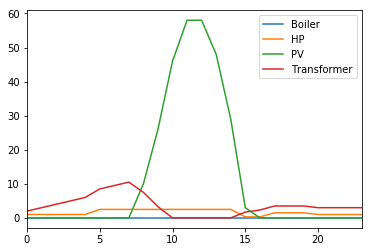

In [5]:
results['solution']['energy_input'].plot()

In [6]:
results['solution']['investment_cost']

61522.44714390585

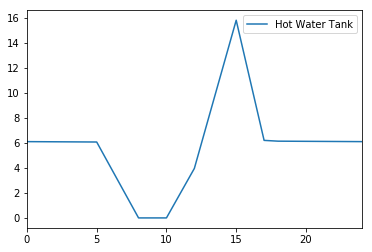

In [159]:
results['solution']['storage_level'].plot()

In [160]:
results['solution']['TankSize']

15.814281770101978